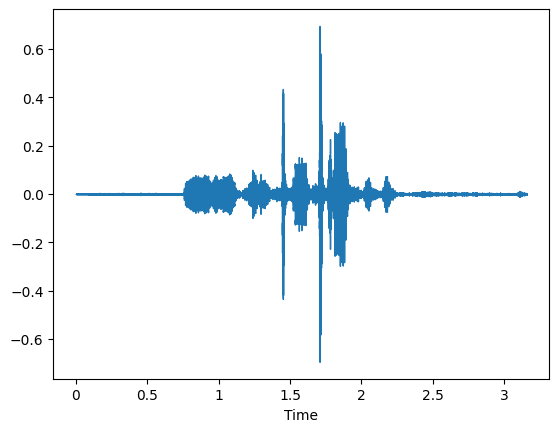

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

In [2]:
#Duration of the audio
signal_length = librosa.get_duration(y=y, sr=sr)
print(f"Signal Length: {signal_length:.2f} seconds")

Signal Length: 3.16 seconds


In [3]:
#Magnitude range
mag_range = librosa.feature.rms(y=y)[0]
max_magnitude = max(mag_range)
print("Maximum Magnitude:",max_magnitude)
min_magnitude = min(mag_range)
print("Minimum Magnitude:",min_magnitude)

Maximum Magnitude: 0.12531629
Minimum Magnitude: 6.7523655e-07


In [4]:
#Reading in audio files
audio_files = glob('/content/Lab1_voice.wav')
ipd.Audio(audio_files[0])

In [5]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 2.2163418e-10 -3.6931319e-10  4.9940030e-10 -6.5567007e-10
  8.3276358e-10 -1.0286672e-09  1.2394696e-09 -1.4600432e-09
  1.6824599e-09 -1.8980293e-09]
shape y: (69678,)
sr: 22050


In [6]:
#Resampling the audio to enhance sampling rate
import librosa
from scipy import signal
import soundfile as sf

def resample_audio(input_file, output_file, target_sr):
    y_resampled = signal.resample(y, int(len(y) * target_sr / sr))
    sf.write(output_file, y_resampled, int(target_sr))
    return y_resampled, sr

input_audio_file = 'Lab1_voice.wav'
output_audio_file = 'Lab1_voice_resampled.wav'
target_sampling_rate = 44100

resample_audio(input_audio_file, output_audio_file, target_sampling_rate)
print(f"Original Sampling Rate: {sr} Hz")
print(f"Resampled to: {target_sampling_rate} Hz")
y_resampled, sr_resampled=resample_audio(input_audio_file, output_audio_file, target_sampling_rate)



Original Sampling Rate: 22050 Hz
Resampled to: 44100 Hz


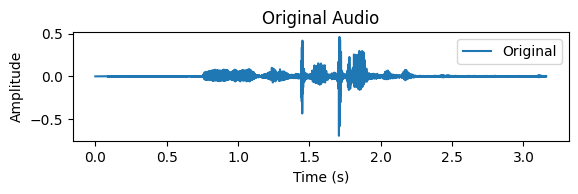

In [7]:
import librosa
from scipy import signal
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

#Original waveform
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, len(y) / sr, len(y)), y, label='Original')
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.legend()

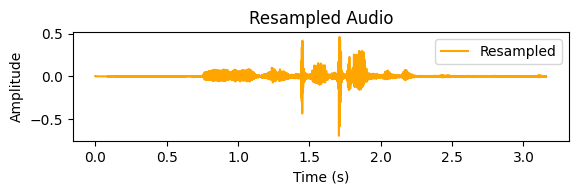

In [8]:
#Resampled waveform
plt.subplot(3, 1, 2)
plt.plot(np.linspace(0, len(y_resampled) / target_sampling_rate, len(y_resampled)), y_resampled, label='Resampled', color='orange')
plt.title('Resampled Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()


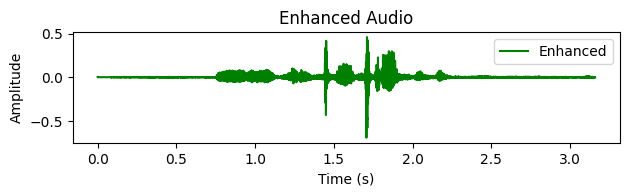

In [9]:
#Enhanced waveform
plt.subplot(3, 1, 3)
plt.plot(np.linspace(0, len(y_resampled) / target_sampling_rate, len(y_resampled)), y_resampled, label='Enhanced', color='green')
plt.title('Enhanced Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

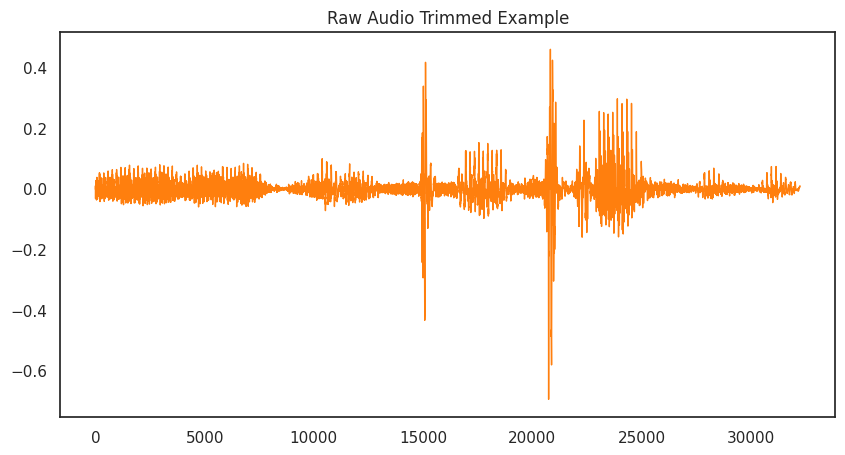

In [11]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

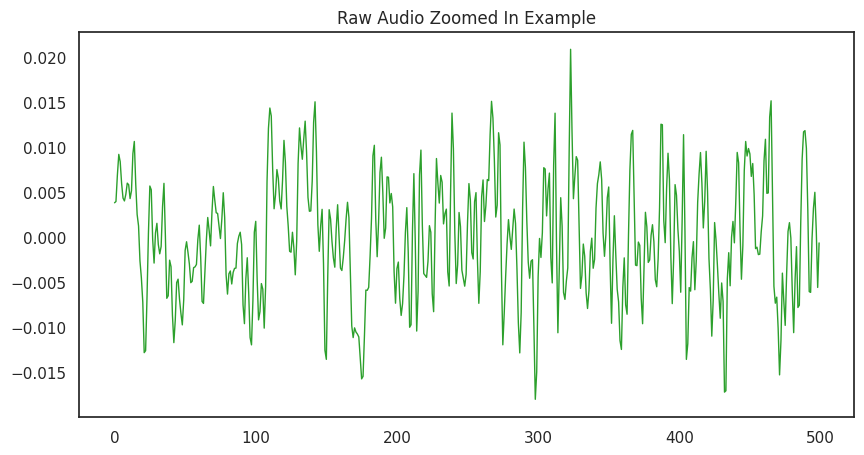

In [12]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [13]:
#Spectogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 137)

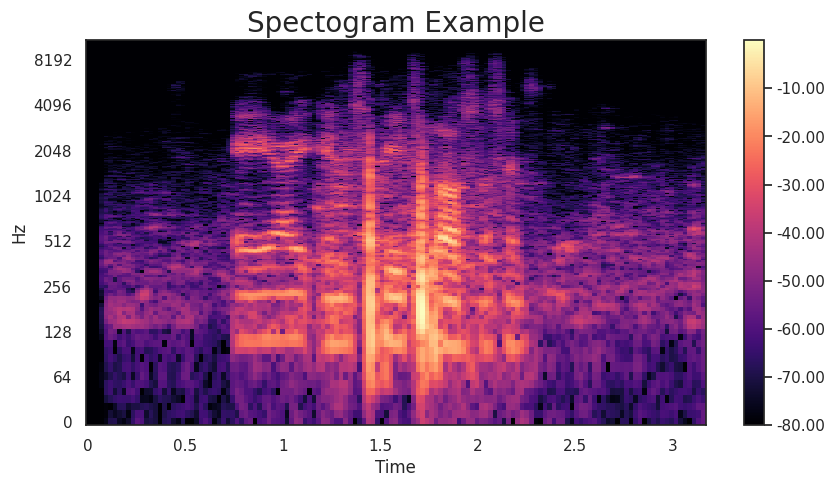

In [14]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

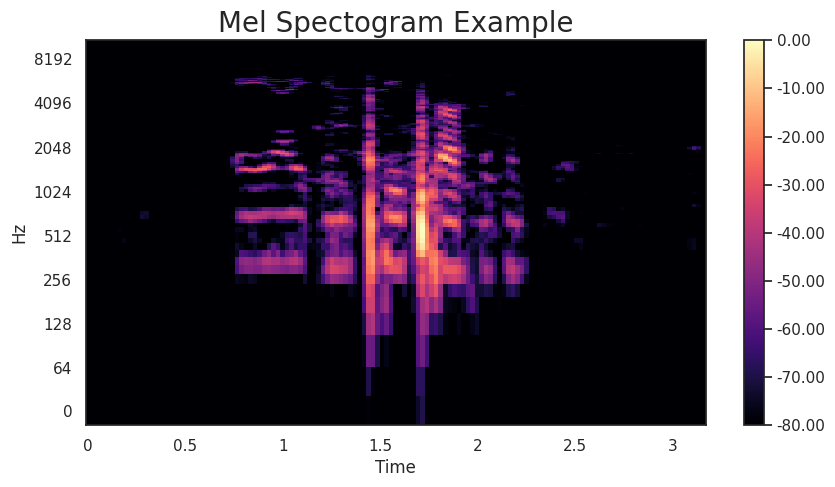

In [15]:
#Mel Spectogram
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
import IPython.display as ipd
start_time = 1
end_time = 2.5
segment = y[int(start_time * sr):int(end_time * sr)]
ipd.Audio(segment, rate=sr)
def play_segment(start_time, end_time):
    yessegment = y[int(start_time * sr):int(end_time * sr)]
    ipd.display(ipd.Audio(segment, rate=sr))
while True:
    try:
        start_time = float(input("Enter start time (in seconds): "))
        end_time = float(input("Enter end time (in seconds): "))
        play_segment(start_time, end_time)
    except ValueError:
        print("Invalid input. Please enter numeric values.")

    continue_playing = input("Do you want to play another segment? (yes/no): ").lower()
    if continue_playing != 'yes':
        break

Enter start time (in seconds): 1
Enter end time (in seconds): 2.5


Original Sampling Rate: 22050 Hz
Resampled to: 44100 Hz


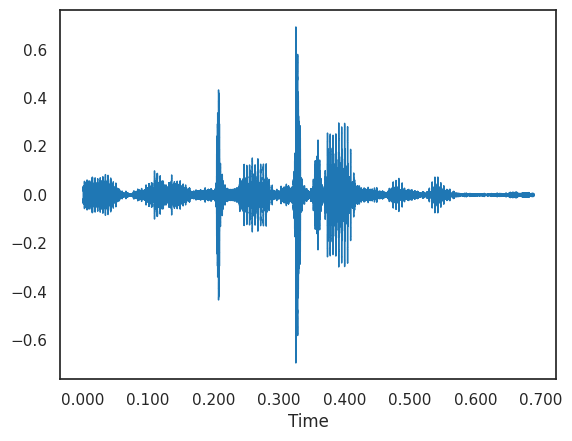

In [20]:
import librosa
from scipy import signal
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def resample_audio(input_file, output_file, target_sr):
    y, sr = librosa.load(input_file, sr=None)
    y_resampled = signal.resample(y, int(len(y) * target_sr / sr))
    sf.write(output_file, y_resampled, int(target_sr))
    return y_resampled, sr

input_audio_file = 'Lab1_voice.wav'
output_audio_file = 'Lab1_voice_resampled.wav'
target_sampling_rate = 44100

# Resample the audio and get the resampled signal and sampling rate
y_resampled, sr_resampled = resample_audio(input_audio_file, output_audio_file, target_sampling_rate)

# Print the original and resampled sampling rates
print(f"Original Sampling Rate: {sr} Hz")
print(f"Resampled to: {target_sampling_rate} Hz")

# Segment the signal from 1s to 2.5s
start_time1 = 1
end_time1 = 2.5
start_sample1 = int(start_time1 * sr)
end_sample1 = int(end_time1 * sr)
segment2 = y[start_sample1:end_sample1]

# Display the segmented signal
librosa.display.waveshow(segment2, sr=sr_resampled)

# Show the plot
plt.show()
